In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.svm as svm
from sklearn.model_selection import cross_val_score

In [12]:
digits = load_digits()

In [13]:
print(digits.data.shape)

(1797, 64)


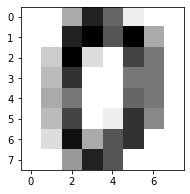

In [14]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [15]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [16]:
digits.data[0].shape

(64,)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,test_size=0.3, random_state=0)

In [18]:
weights=['uniform','distance']
result = {}
for k in range(1,14):
    for w in weights:
        knn = KNeighborsClassifier(n_neighbors=k,weights=w)
        sm = cross_val_score(knn, digits.data, digits.target, scoring='accuracy', cv = 6).mean()
        result[w + str(k)] = sm
print(list(result)[np.array(list(result.values())).argmax()])

# as we can see from the result weights = distance, n_neighbors = 4 is the best choise.

distance4


In [19]:
model = KNeighborsClassifier(n_neighbors=4,weights='distance')
model.fit(x_train, y_train)
# predict the test data
y_prd_knn = model.predict(x_test)
print("KNN:\nAccuracy:  %f \nRecall: %f\n " % (metrics.accuracy_score(y_test, y_prd_knn), metrics.recall_score(y_test, y_prd_knn, average='macro')))
print("Matrix:")
print(metrics.confusion_matrix(y_test, y_prd_knn))

KNN:
Accuracy:  0.987037 
Recall: 0.987488
 
Matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  1  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 55  1  0  0  1]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 0  0  0  1  0  0  1  0 59  0]
 [ 0  0  0  0  0  1  0  0  0 56]]


In [20]:
svm_clf = svm.SVC()
svm_clf.fit(x_train, y_train)
y_prd_svm = svm_clf.predict(x_test)
print("SVM:\nAccuracy:  %f \nRecall: %f \n " % (metrics.accuracy_score(y_test, y_prd_svm), metrics.recall_score(y_test, y_prd_svm, average='macro')))
print("Matrix:")
print(metrics.confusion_matrix(y_test, y_prd_svm))

SVM:
Accuracy:  0.990741 
Recall: 0.991246 
 
Matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0 55  1  0  0  1]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 0  1  0  0  0  0  0  0 60  0]
 [ 0  0  0  0  0  1  0  0  0 56]]


In [21]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
y_prd_rf = rf_clf.predict(x_test)
print("rf:\nAccuracy:  %f \nRecall: %f \n " % (metrics.accuracy_score(y_test, y_prd_rf), metrics.recall_score(y_test, y_prd_rf, average='macro')))
print("Matrix:")
print(metrics.confusion_matrix(y_test, y_prd_rf))

rf:
Accuracy:  0.974074 
Recall: 0.974508 
 
Matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  1  0  0  0  1]
 [ 1  1 50  1  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  1  0 54  1  0  0  1]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 0  1  0  1  0  0  0  0 59  0]
 [ 0  0  0  0  0  2  0  0  0 55]]


In [22]:
print("KNN:\nAccuracy:  %f \nRecall: %f\n " % (metrics.accuracy_score(y_test, y_prd_knn), metrics.recall_score(y_test, y_prd_knn, average='macro')))
print("SVM:\nAccuracy:  %f \nRecall: %f \n " % (metrics.accuracy_score(y_test, y_prd_svm), metrics.recall_score(y_test, y_prd_svm, average='macro')))
print("rf:\nAccuracy:  %f \nRecall: %f \n " % (metrics.accuracy_score(y_test, y_prd_rf), metrics.recall_score(y_test, y_prd_rf, average='macro')))


KNN:
Accuracy:  0.987037 
Recall: 0.987488
 
SVM:
Accuracy:  0.990741 
Recall: 0.991246 
 
rf:
Accuracy:  0.974074 
Recall: 0.974508 
 


In [23]:
print("SVM_Matrix:")
print(metrics.confusion_matrix(y_test, y_prd_svm))

SVM_Matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0 55  1  0  0  1]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 0  1  0  0  0  0  0  0 60  0]
 [ 0  0  0  0  0  1  0  0  0 56]]
